## 1. Load the data

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


| Feature                                                                     | Meaning                                   |
| --------------------------------------------------------------------------- | ----------------------------------------- |
| `Age`                                                                       | Age in years                              |
| `Sex`                                                                       | Male / Female                             |
| `ChestPainType`                                                             | Type of chest pain                        |
| `RestingBP`                                                                 | Resting blood pressure                    |
| `Cholesterol`                                                               | Serum cholesterol level                   |
| `FastingBS`                                                                 | Fasting blood sugar > 120 mg/dl           |
| `RestingECG`                                                                | Resting electrocardiographic results      |
| `MaxHR`                                                                     | Maximum heart rate achieved               |
| `ExerciseAngina`                                                            | Exercise-induced angina                   |
| `Oldpeak`                                                                   | ST depression induced by exercise         |
| `ST_Slope`                                                                  | Slope of the ST segment                   |
| `HeartDisease`                                                              | Target label: 1 = disease, 0 = no disease |
| *(exact naming might vary slightly based on dataset version)* ([Medium][1]) |                                           |

[1]: https://medium.com/%40ammasanaswar/predicting-likelihood-of-heart-failure-335a8ecfb4ed?utm_source=chatgpt.com "Predicting Likelihood of Heart Failure | by Anaswar Jayakumar"


In [4]:
print(df.shape)
print(df.info())

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


## 2. Data Preprocessing
### 2.1. Handle missing values 

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 2.2. Converts categorical variables into one-hot encoding
Each unique category in feature columns has been transformed into a separate binary (True or False) column. 

In [8]:
# from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, drop_first=True)

In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


### 2.3. Target Correlations

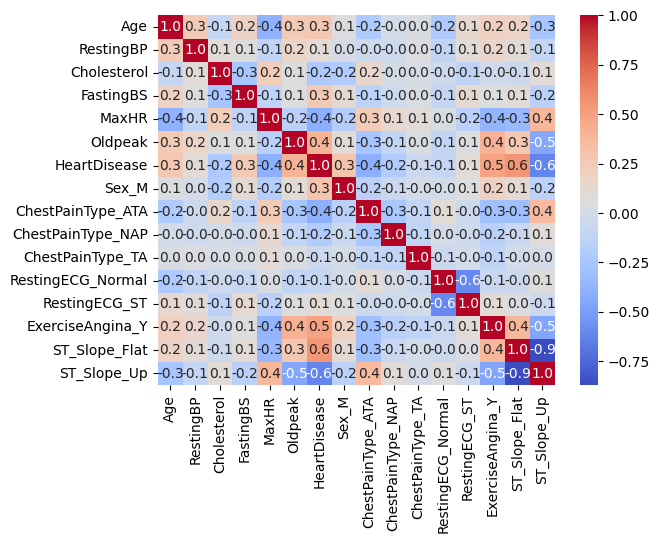

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

The target variable (HeartDisease) exhibits the strongest positive correlations with features such as Oldpeak, ST_Slope_Flat, and ExerciseAngina, as well as moderate correlations with Age and Sex.

In contrast, MaxHR and ST_Slope_Up show negative correlations with the target opposite effects.

The heatmap also highlights that several features (Oldpeak, ST_Slope_Flat, ExerciseAngina) are inter-correlated, suggesting partial redundancy. Tree-based models such as Random Forest or XGBoost can naturally handle feature redundancy through node splitting, while linear models like Logistic Regression may benefit from regularization to avoid multicollinearity issues.

In [32]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# features = ['Age', 'ST_Slope_Flat', 'Cholesterol', 'ExerciseAngina_Y',
#             'Sex_M', 'Oldpeak', 'FastingBS', 'RestingBP']

# X = df[features]
# y = df['HeartDisease']


## 3. Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Train machine learning models 


Using standardScaler scaling feature to standardize the values of numeric features. It transforms data -> means becomes 0, standard deviation becomes 1

Using the method for SVM, logistic regression or NN

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_data, columns=X_train.columns)  
scaled_df.head()

X_scaled_train = scaler.transform(X_train)  
X_scaled_test = scaler.transform(X_test)    


### 4.1. Logistic Regression

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



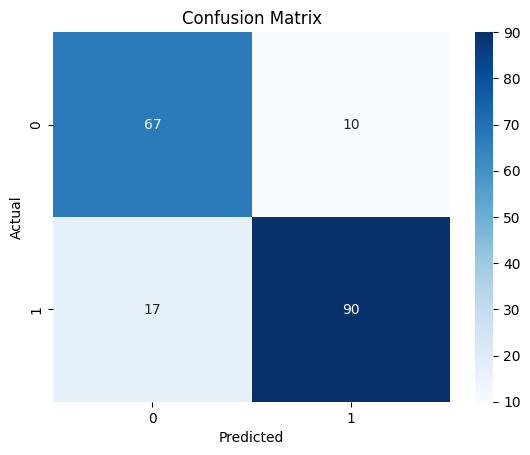

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


clf = LogisticRegression(max_iter=1000)
clf.fit(X_scaled_train, y_train)
y_pred = clf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4.2. Random Forest

Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



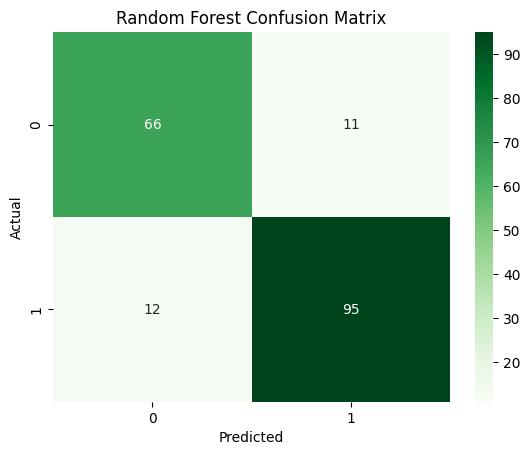

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_scaled_train, y_train)
y_pred_rfc = rfc.predict(X_scaled_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Random Forest Accuracy: {accuracy_rfc:.2f}')
print(classification_report(y_test, y_pred_rfc))

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### 4.3. Decision Tree

Decision Tree Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



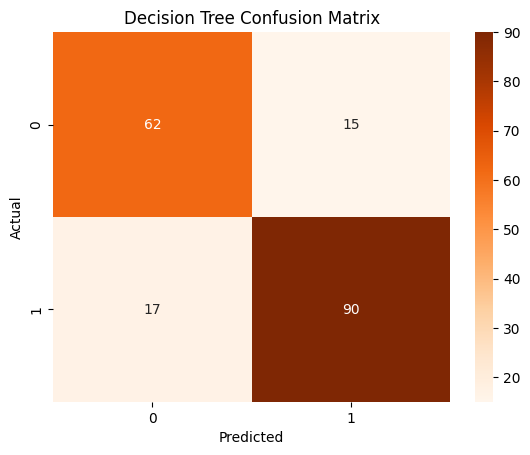

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_scaled_train, y_train)
y_pred_dtc = dtc.predict(X_scaled_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f'Decision Tree Accuracy: {accuracy_dtc:.2f}')
print(classification_report(y_test, y_pred_dtc))
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

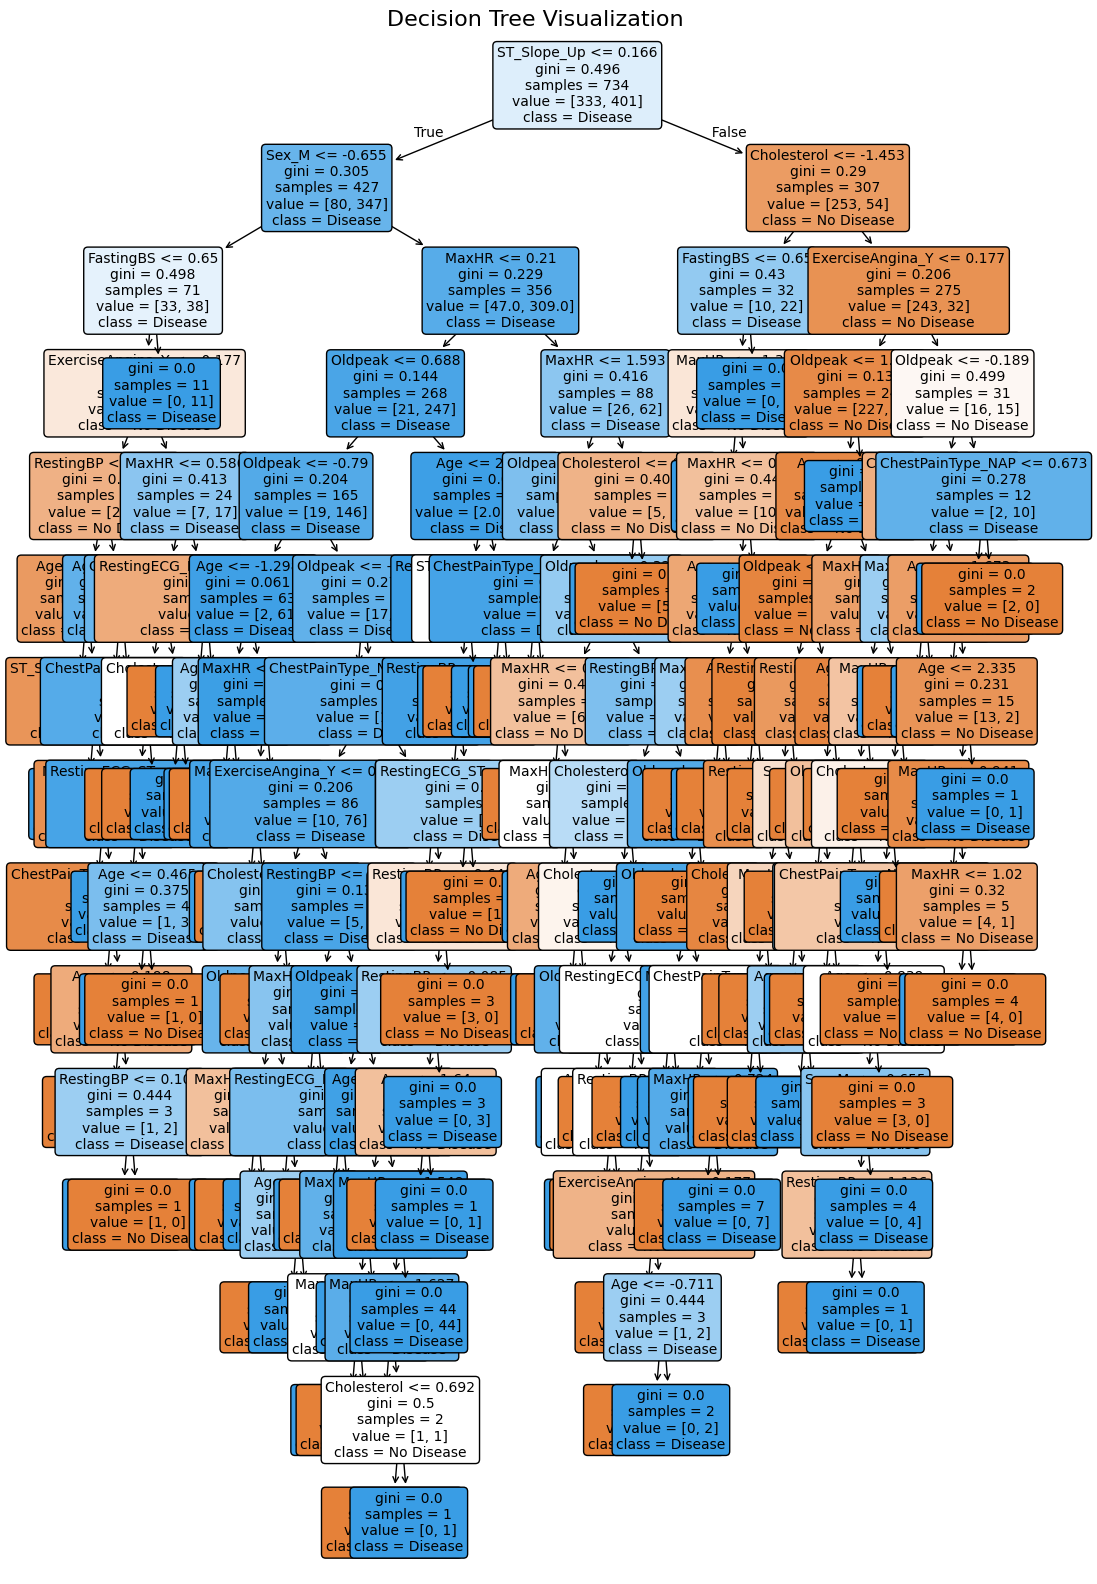

In [48]:
from sklearn.tree import  plot_tree

plt.figure(figsize=(12, 20))
plot_tree(
    dtc,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,          
    rounded=True,        
    fontsize=10
)

# Title and display
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


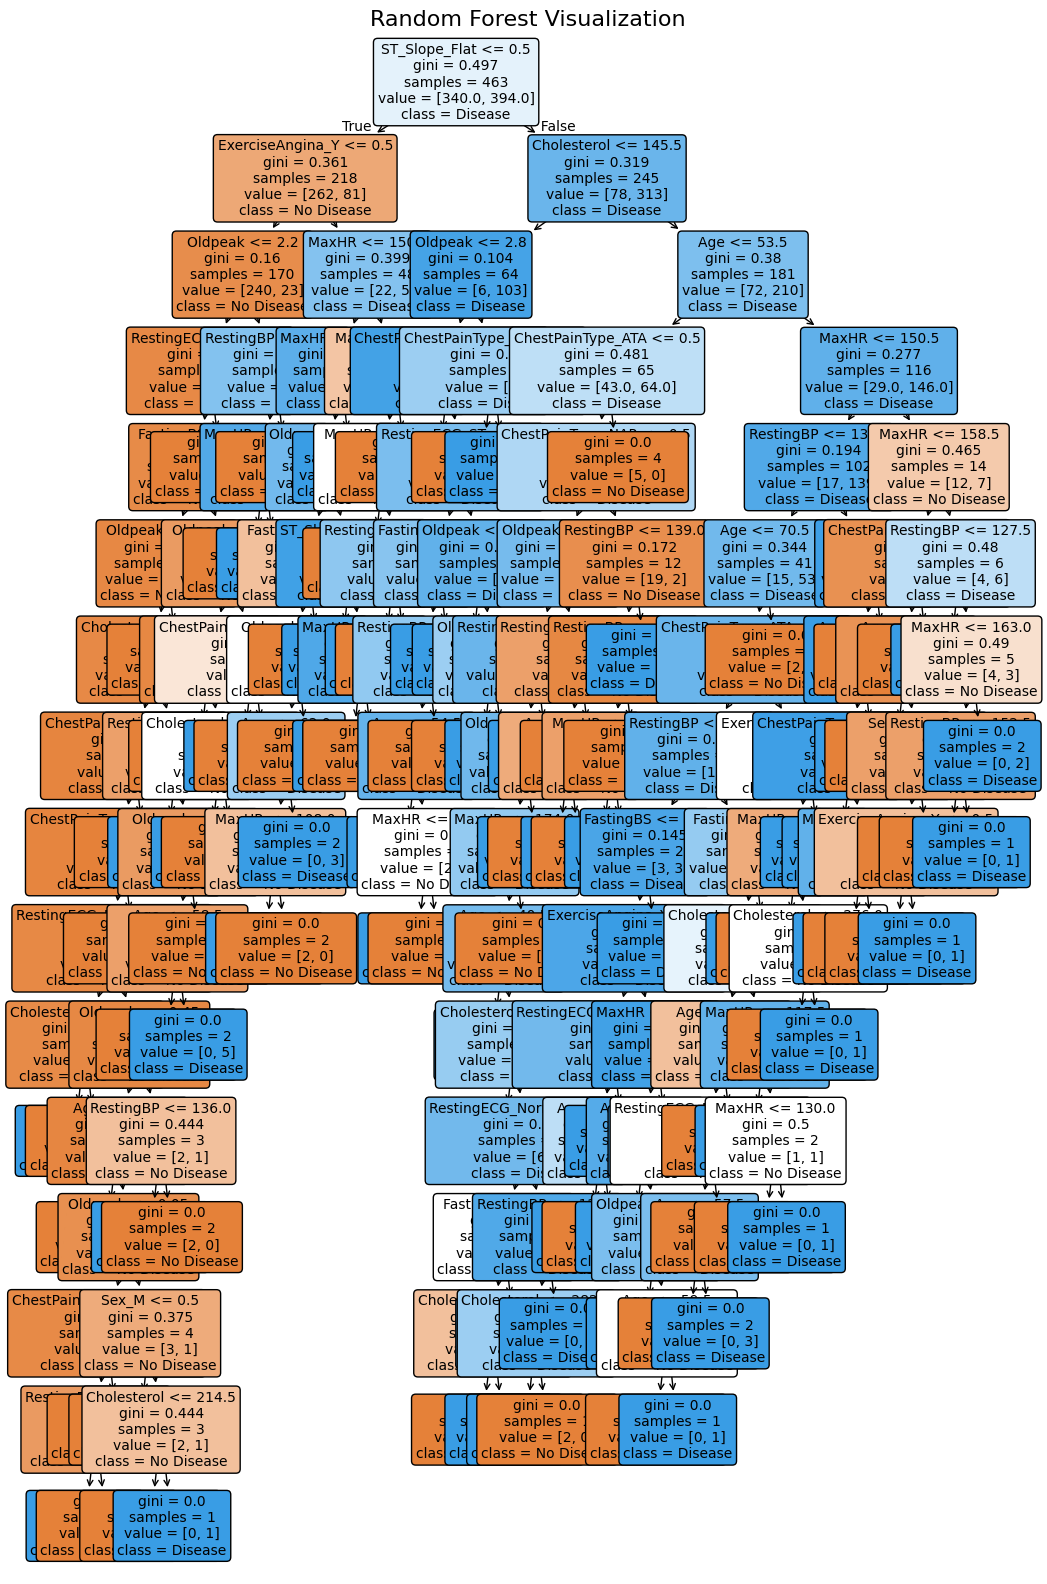

In [51]:
from sklearn.tree import  plot_tree

plt.figure(figsize=(12, 20))
plot_tree(
    rfc.estimators_[0],
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,          
    rounded=True,        
    fontsize=10
)

# Title and display
plt.title("Random Forest Visualization", fontsize=16)
plt.show()


### 4.4. Support Vector Machine (SVM)

SVM Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184



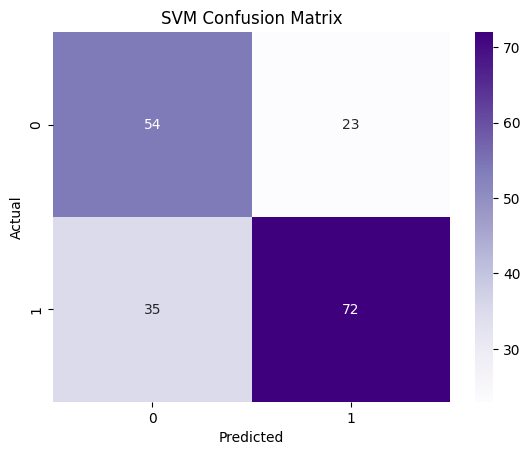

In [53]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'SVM Accuracy: {accuracy_svc:.2f}')
print(classification_report(y_test, y_pred_svc))

sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Purples')  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()




### 4.5. XGBoost

XGBoost Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



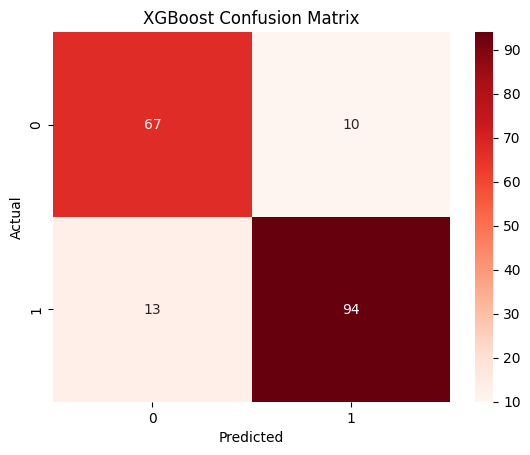

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300, 
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


## 5. Hyperparameter tuning

Hyperparameters were tuned using GridSearchCV with AUC as the scoring metric. AUC was chosen because it evaluates classifier performance across multiple thresholds and provides a threshold-independent measure of discrimination, which is particularly relevant for medical risk prediction

In [83]:
from sklearn.model_selection import RandomizedSearchCV  

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rfc_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)
rfc_random.fit(X_train, y_train)
print("Best Parameters:", rfc_random.best_params_)
print("Best Score:", rfc_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 9, 'bootstrap': False}
Best Score: 0.928330642391915


In [70]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
}
grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),
    param_grid=params,
    cv=5,
    scoring='roc_auc'
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best AUC:", grid.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best AUC: 0.9292646266423216


## 6. ROC-AUC

Because this project is medical problems, using ROC curves helps to evaluate the model across **many possible thresholds**. Eg: for thresholds [0, 1] such as: 0.0, 0.05, 0.1, 0.2, …, 0.9, 1.0

Using AUC basically sums the performance across all thresholds (sum the True Positive Rate vs False Positive Rate trade-off across thresholds.)

ROC curves evaluate classifier performance across multiple decision thresholds, and AUC summaries this performance into a single metric that reflect the classifier's ability to distinguish between the two classes. 

false negatives = dangerous, false positives = safer. This method helps to understand how well does the model detect disease acress different levels of strictness. 

XGBoost AUC: 0.93
LogisticRegression AUC: 0.56
RandomForest AUC: 0.94
DecisionTree AUC: 0.58


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


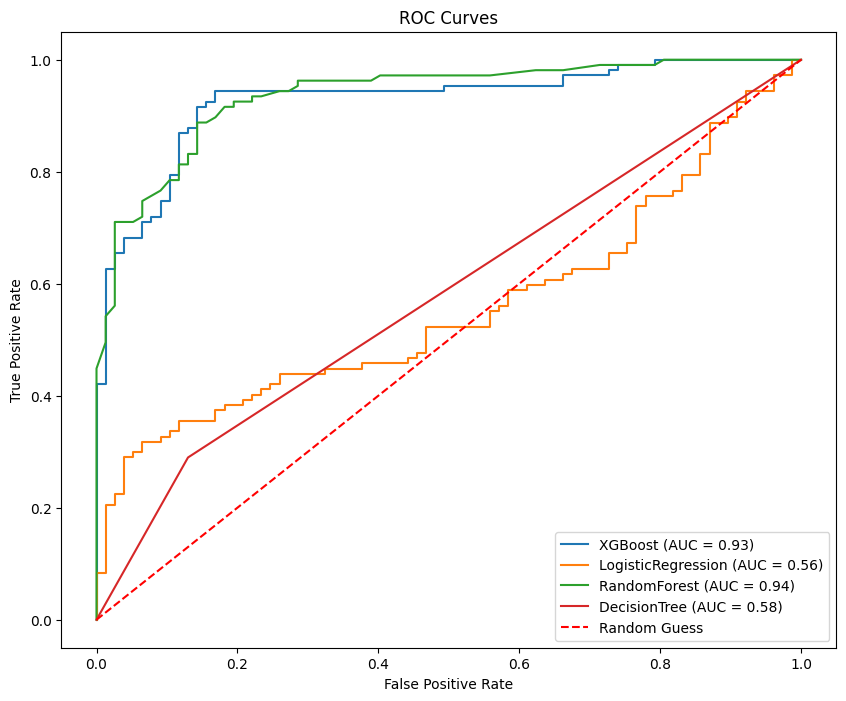

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

methods = [["XGBoost", xgb], ["LogisticRegression", clf], ["RandomForest", rfc], ["DecisionTree", dtc]]

plt.figure(figsize=(10, 8))
for name, model in methods:
    prob= model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, prob)
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    print(f'{name} AUC: {auc:.2f}' )    

plt.plot([0, 1], [0, 1],  'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()




## 7. Conclusion

I trained several machine learning models to predict heart disease based on patient data. The models include Logistic Regression, Random Forest, Decision Tree, Support Vector Machine (SVM), and XGBoost. Each model was evaluated using accuracy, classification reports, confusion matrices, and ROC curves.

The best model is Random Forest with Accuracy = 0.87 and AUC 0.93 on the test set.

In [93]:
best_params = {
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_depth': 9,
    'bootstrap': False
}

best_rfc = RandomForestClassifier(**best_params, random_state=42)
best_rfc.fit(X_train, y_train)


y_pred = best_rfc.predict(X_test)
y_prob = best_rfc.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043
AUC: 0.9326374560019419
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

[[65 12]
 [12 95]]


In [90]:
import joblib
joblib.dump(best_rfc, 'rf_best_model.pkl')


['rf_best_model.pkl']

## 8. Change to 8 features instead of 15 features